In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library

In [2]:

import pandas
import numpy as np
import matplotlib.pyplot as matplot
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Load text file

In [3]:
train = pandas.read_csv('/content/drive/MyDrive/pattern lab/test-Minimum-Error-Rate-Classifier.txt',header = None);
train = np.array(train)

#initialize mean,sigma(variance),prior 

In [4]:
mean1 = [0,0]
mean2 = [2,2]
sigma1 = [[.25,.3],[.3,1]]
sigma2 = [[.5,0],[0,.5]]
prior1 = 0.5
prior2 = 0.5

#converting in numpy arrays
mean1=np.array(mean1)
mean2=np.array(mean2)
sigma1=np.array(sigma1)
sigma2=np.array(sigma2)

In [5]:
trainNew=np.zeros([6,3])
trainNew[:,0]=train[:,0]
trainNew[:,1]=train[:,1]

In [6]:
tempClass=[]
resultClass1 = 0
resultClass2 = 0
for i in range(len(train)):
        resultClass1 = -0.5*np.dot(np.dot((train[i,:]-mean1).T,np.linalg.inv(sigma1)),(train[i,:]-mean1))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma1))+np.log(prior1)
        resultClass2 = -0.5*np.dot(np.dot((train[i,:]-mean2).T,np.linalg.inv(sigma2)),(train[i,:]-mean2))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma2))+np.log(prior2) 
        if (resultClass1 > resultClass2):
            tempClass.append(1)
        else:
            tempClass.append(2)
print(tempClass)

[1, 1, 2, 2, 1, 2]


In [7]:

for i in range(len(tempClass)):
    trainNew[i][-1]=tempClass[i]
print(trainNew)

[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 0.   2.   1. ]
 [ 2.  -3.   2. ]]


In [8]:

class1 =[([x[0],x[1],x[2]]) for x in trainNew if x[2] == 1]
class2 =[([x[0],x[1],x[2]]) for x in trainNew if x[2] == 2]
class1 = np.array(class1)
class2 = np.array(class2)
print(class1)
print(class2)

[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 0.  2.  1.]]
[[ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 2.  -3.   2. ]]


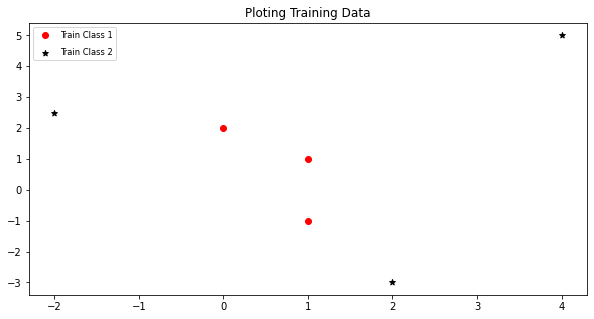

In [9]:
fig,ax = matplot.subplots()
ax.set_title('Ploting Training Data')
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
matplot.show()

In [10]:
X = np.linspace(-8, 8, 32)
Y = np.linspace(-8, 8, 32)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))

pos[:, :, 0] = X
pos[:, :, 1] = Y


def multivariate_gaussian(pos, mean, Sigma):
    d = mean.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**d * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mean, Sigma_inv, pos-mean)
    return np.exp(-fac / 2) / N

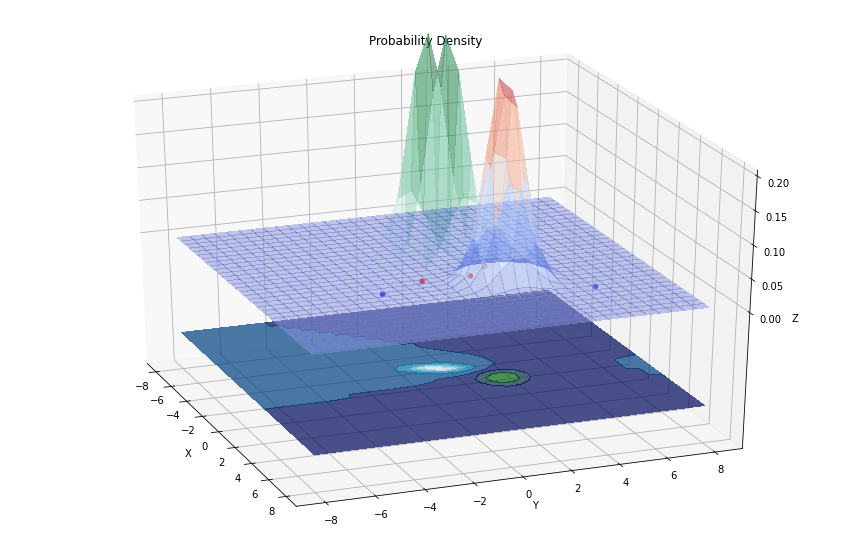

In [11]:
Z = multivariate_gaussian(pos, mean1, sigma1)

Z1 = multivariate_gaussian(pos, mean2, sigma2)
fig = matplot.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax = fig.gca(projection='3d')
db=Z-Z1

z=0

ax.scatter(class1[:,0],class1[:,1], z,color='red')
ax.scatter(class2[:,0],class2[:,1], z,color='blue')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=False,
               cmap=cm.BuGn,alpha=.3)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=False,
                cmap=cm.coolwarm,alpha=.3)
ax.contourf(X, Y, db, zdir='z', offset=-.15,cmap=cm.ocean,alpha=0.7)
ax.set_title('Probability Density') 

ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.20,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

matplot.show()